<a href="https://colab.research.google.com/github/CodeWithAlvin/face_emotion_detector_live/blob/main/emotion_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/Others/emo_pix.pkl",'rb') as f:
  X=pickle.load(f)
with open("/content/drive/MyDrive/Others/emo_val.pkl",'rb') as f1:
  y=pickle.load(f1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# visualizing data

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

In [ ]:
def show_feature(X,y):
  image=X.reshape(48,48)
  imgplot = plt.imshow(image)
  plt.show()
  print(emotion_dict[y])

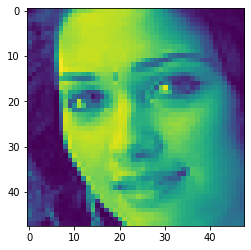

Happy


In [ ]:
show_feature(X_train[128],y_train[128])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_histo(array):
  pd.DataFrame(array).hist(bins=20, figsize=(15,15), color='b')
  plt.show()

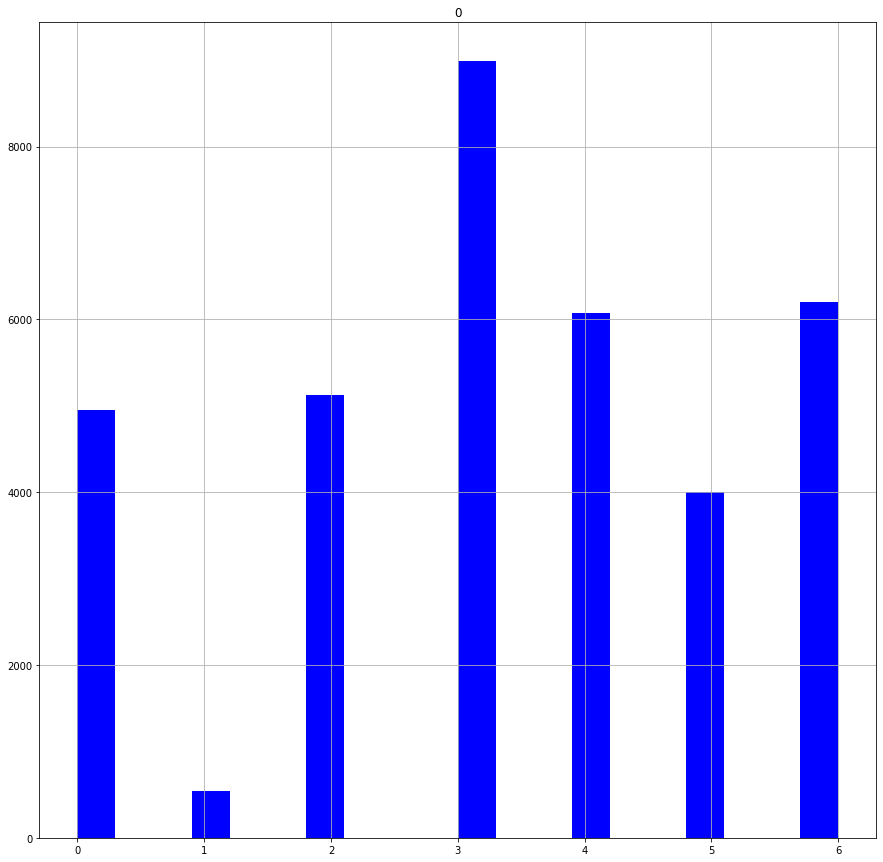

In [ ]:
show_histo(y)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def create_model(*args,**kwargs):
  pipe=make_pipeline(*args,**kwargs)
  return pipe

In [ ]:
pipeline=create_model(StandardScaler())

In [ ]:
prepared_data=pipeline.fit_transform(X_train)

In [ ]:
model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                        warm_start=False)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
with open("/content/drive/MyDrive/Others/model_random.pkl","wb") as f:
  pickle.dump(model,f)

In [ ]:
#Checking accuracy

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import cross_val_predict

In [ ]:
#final testing

In [ ]:
def analyze_model(y_orignal,y_pred,):
  f1=f1_score(y_orignal, y_pred,average='micro')
  precision=precision_score(y_orignal,y_pred,average='micro')
  recall=recall_score(y_orignal,y_pred,average='micro')
  print(f"f1-score : {f1}\nprecision : {precision}\nrecall : {recall}")

# on training set

In [ ]:
y_pred_train=model.predict(X_train)

In [ ]:
analyze_model(y_train,y_pred_train)

f1-score : 0.9984325472848236
precision : 0.9984325472848236
recall : 0.9984325472848236


# on Test Set

In [ ]:
y_pred_train=model.predict(X_test)

In [ ]:
analyze_model(y_test,y_pred_train)

f1-score : 0.4575090554471998
precision : 0.4575090554471998
recall : 0.4575090554471998
